In [2]:
%matplotlib inline
import pandas as pd # library for creating DataFrame
import numpy as np # algebra
import seaborn as sns # mor attractive graphics
import matplotlib.pyplot as plt # plotting
import random # selection of radom values for plotting

In [4]:
# reading csv file containing crew information
titanic = pd.read_csv('titanic_data.csv')
print('This dataset haves {} rows and {} columns'.format(titanic.shape[0], titanic.shape[1]))
titanic.head()

This dataset haves 891 rows and 12 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# removing columns that not be used
titanic.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1, inplace = True)
titanic.head()

ValueError: labels ['Ticket' 'Cabin' 'PassengerId'] not contained in axis

In [9]:
# rename city names
titanic['Embarked'] = titanic['Embarked'].replace(['S', 'Q', 'C'], ['Southampton', 'Queenstown', 'Cherbourg'])
titanic['Survived'] = titanic['Survived'].replace([1,0],['Sim', 'Não'])
titanic['Sex'] = titanic['Sex'].replace(['male','female'], ['Masculino', 'Feminino'])
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,Sim,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,Não,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Não,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Não,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,Sim,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton


In [10]:
# data types by python
titanic.dtypes

Survived     object
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [8]:
# getting information about numeric columns with describe() function
titanic.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic['Age'].fillna(0, inplace = True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,Sim,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,Não,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Não,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Não,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,Sim,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton


In [10]:
# rename columns to portuguese
titanic.columns = ['Sobreviveu?', 'Classe', 'Nome', 'Sexo', 'Idade', 'Irmãos/Cônjuge', 'Pais/Crianças', 'Tarifa', 'Embarque']
titanic.head()

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,Sim,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,Não,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Não,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Não,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,Sim,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton


In [11]:
# colors to use in the graphics
colors = [
     ['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
     ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
     ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
     ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
     ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
     ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
     ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
]

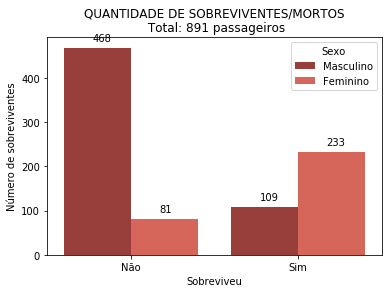

In [21]:
# quantity of survivers and deads in incident
passengers = sns.countplot(data = titanic, x = 'Sobreviveu?', hue = 'Sexo', palette = 'Reds_d')

# positioning values above the bars
for p in passengers.patches : 
    b = p.get_bbox()
    
    passengers.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.title('QUANTIDADE DE SOBREVIVENTES/MORTOS\n Total: {} passageiros'.format(titanic.shape[0]))
plt.xlabel('Sobreviveu')
plt.ylabel('Número de sobreviventes')
plt.show()

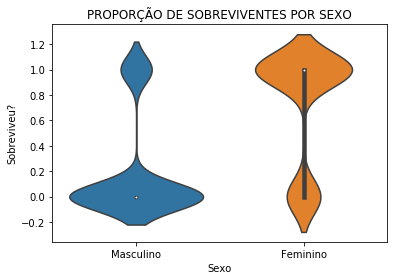

In [22]:
survivers_sexo = titanic.copy()
survivers_sexo['Sobreviveu?'] = titanic['Sobreviveu?'] == 'Sim'

sns.violinplot(data = survivers_sexo, y = 'Sobreviveu?', x = 'Sexo', size = 10)

plt.title('PROPORÇÃO DE SOBREVIVENTES POR SEXO')
plt.show()

In [23]:
# creating a DataFrame that has just womans and childrens
priorities = (titanic['Idade'] <= 15) & (titanic['Idade'] > 0) | (titanic['Sexo'] == 'Feminino')
priorities = titanic[priorities]
priorities.head()

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
7,Não,3,"Palsson, Master. Gosta Leonard",Masculino,2.0,3,1,21.0750,Southampton
8,Sim,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Feminino,27.0,0,2,11.1333,Southampton


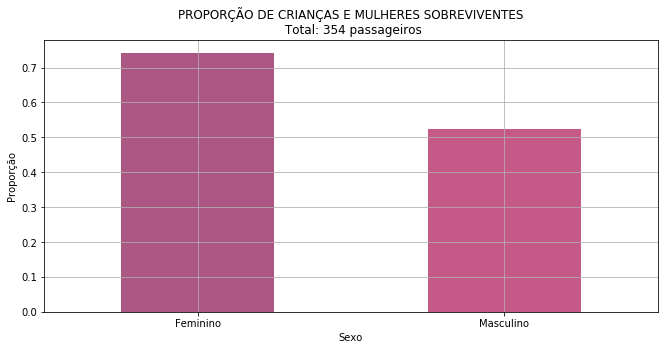

In [25]:
priorities.groupby('Sexo')['Sobreviveu?'].apply(lambda x : np.mean(x == 'Sim')).plot(kind = 'bar', color = random.choice(colors), alpha = .7, figsize = (11,5), rot = 0, grid = True)

plt.title('PROPORÇÃO DE CRIANÇAS E MULHERES SOBREVIVENTES\n Total: {} passageiros'.format(priorities.shape[0]))
plt.ylabel('Proporção')
plt.show()